In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
root_path = 'E:\MyRepository\Jupyter\Kaggle\titanic'

In [16]:
 
titanic = [train, test]

## 数据分析

In [4]:
# 数据概览
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 训练数据和测试数据的数据类型、缺失值统计
train_info = train.info()
print('-'*40)
test_info = test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [7]:
# 数据特征值的分布统计
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 查看存活人数
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
# 对缺失值处理（Age 中位数不错）
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Fare"] = train["Fare"].fillna(train["Fare"].median())

In [20]:
# 对文本特征进行处理（性别， 登船港口）
print(train["Sex"].unique())
train.loc[train["Sex"]=="male", "Sex"] = 0
train.loc[train["Sex"]=="female", "Sex"] = 1


['male' 'female']


### 相关性系数

In [22]:
# 相关性系数
train_corr = train.corr()
train_corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000


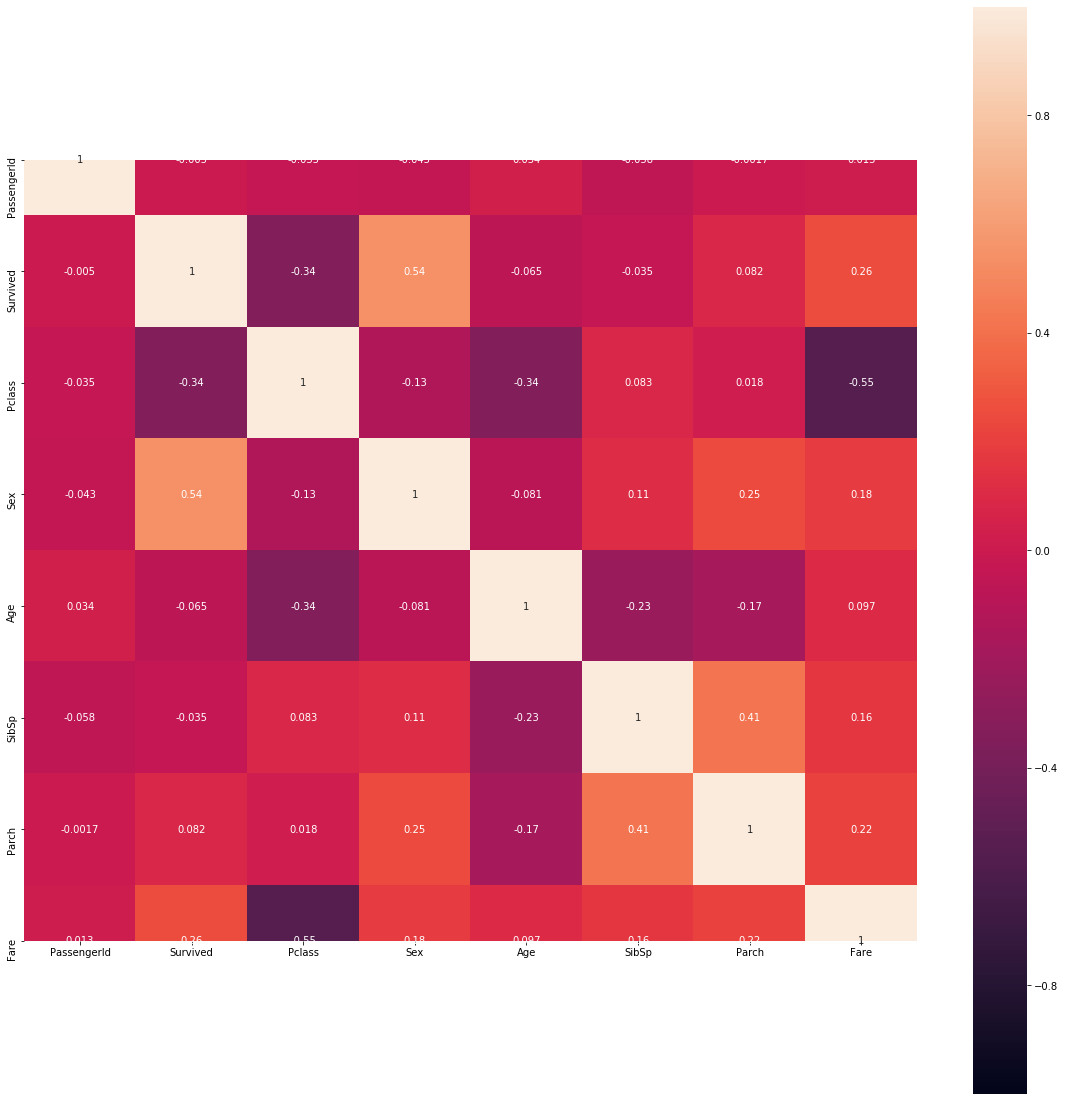

In [26]:
# 相关性系数热力图
a = plt.subplots(figsize=(20,20))#调整画布大小
a = sns.heatmap(train_corr, vmin=-1, vmax=1 , annot=True , square=True)#画热力图